<b> Title :</b><br>
<b> &emsp; Webapp to predict the optimal price of a used vehicle. </b><br><br>
<b>Team Members :</b><br>
<b> &emsp;  Sriram Manne </b> <br>
   &emsp;   <b>Sarath Surendran</b><br><br>
<b> Date :</b><br>
     &emsp;   <b>10-20-2022</b>

#### About the Dataset

The dataset used for this project was taken from Kaggle and can be found here:<br/>
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data <br><br>
The dataset contains used vehicles data scraped from Craigslist.  <br><br>
The author of the dataset is  : ‘Austin Reese’  <br><br>
The whole dataset is nearly 1.5gb in size and was downloaded in csv format  <br><br>

<b>The dataset has 26 columns : </b><br><br>
&emsp;<b> id :</b> entry ID <br>
&emsp;<b>	url :</b> listing URL <br>
&emsp;<b>	region :</b> listed region<br>
&emsp;<b>	region_url :</b> region url<br>
&emsp;<b>	price :</b> listed price <br>
&emsp;<b>   year :</b> year listed<br>
&emsp;<b>	manufacturer :</b> manufacturer of vehicle<br>
&emsp;<b>	model :</b> model of vehicle<br>
&emsp;<b>	condition :</b> condition of vehicle<br>
&emsp;<b>	cylinders :</b> number of cylinders<br>
&emsp;<b>	fuel :</b> fuel type<br>
&emsp;<b>	odometer :</b> miles traveled by vehicle<br>
&emsp;<b>	title_status :</b> title status of vehicle<br>
&emsp;<b>	transmission :</b> transmission of vehicle<br>
&emsp;<b>	VIN :</b> vehicle identification number<br>
&emsp;<b>	drive :</b> type of drive<br>
&emsp;<b>	size :</b> size of vehicle<br>
&emsp;<b>	type :</b> generic type of vehicle<br>
&emsp;<b>	paint_color :</b> color of vehicle<br>
&emsp;<b>	image_url :</b> image URL<br>
&emsp;<b>	description :</b> listed description of vehicle<br>
&emsp;<b>	county :</b> useless column left in by mistake<br>
&emsp;<b>	state :</b> state of listing<br>
&emsp;<b>	lat :</b> latitude of listing<br>
&emsp;<b>	long :</b> longitude of listing<br>
&emsp;<b>	posting_date :</b> date posted in craigslist<br><br>


#### All imports required for the program to run

In [151]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score


from factor_analyzer import FactorAnalyzer 
from sklearn.decomposition import FactorAnalysis, PCA
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
import pickle

import warnings
warnings.filterwarnings("ignore")


Reading the extracted csv file and storing it in dataframe for further analysis

In [152]:
df_vehicles = pd.read_csv('dataset/vehicles.csv', delimiter=',')
df_vehicles.shape

(426880, 26)

### Exploratory Data Analysis

The dataset seems to contain 426880 records with 26 different attributes

In [153]:
df_vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Just by printing the top rows, its evident that the dataset has lots of empty values

Further descbring the dataset

In [154]:
df_vehicles.describe(include="all")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


The county column seems to have no values. This field along with all the urls,lat,long,description and VIN will not be considered for analysis. So removing them altogether

In [156]:
df_vehicles=df_vehicles.drop(columns=["id","county","region_url","VIN","image_url","url",
                                      "lat","long","description"])
df_vehicles.dtypes

KeyError: "['id', 'county', 'region_url', 'VIN', 'image_url', 'url', 'lat', 'long', 'description'] not found in axis"

In [157]:
df_vehicles.dtypes


region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
posting_date     object
dtype: object

#### Handling missing values

First we get a count of all missing values present under each column

In [158]:
df_vehicles.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
posting_date        68
dtype: int64

Further inspecting the size column which has the largest number of missing values

In [159]:
df_vehicles['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

We will modify the size column to use numerical values

In [160]:
df_vehicles['size']=df_vehicles['size'].astype("category")
df_vehicles['size_codes']=df_vehicles['size'].cat.codes

In [161]:
df_vehicles['size_codes'].value_counts()

-1    306361
 1     63465
 2     34476
 0     19384
 3      3194
Name: size_codes, dtype: int64

So the size of the vehicle is now updated as the following :<br>
"Missing": 0,<br>"full-size": 4,<br>"mid-size": 3,<br>"compact": 2,<br>"sub-compact": 1


Checking manufacturer values

In [162]:
df_vehicles["manufacturer"].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

Replacing missing values with "Others"

In [163]:
df_vehicles['manufacturer'].fillna("others",inplace=True)

In [164]:
df_vehicles['manufacturer'].value_counts()
df_vehicles['manufacturer']=df_vehicles['manufacturer'].astype('category')
df_vehicles['make']=df_vehicles['manufacturer'].cat.codes

In [165]:
df_vehicles['make'].value_counts()

13    70985
7     55064
40    34202
16    21269
31    19067
20    19014
35    18342
32    17646
14    16785
4     14699
10    13707
26    11817
17    10338
38     9495
41     9345
21     8457
23     8200
3      7573
6      6953
8      6031
0      5978
5      5501
25     5427
18     4802
24     4220
42     3374
29     3292
28     2376
33     2288
36     2113
19     1946
34     1384
27     1184
37     1090
1       897
39      868
12      792
15      153
11       95
9        63
2        24
22       21
30        3
Name: make, dtype: int64

All missing values are now replaced with 'Others'

Also most of the vehicle listings seems to be manufactured by 'ford'

Further dropping all the missing values from the dataset

Filtering out vehicles with make year less than 1970

In [166]:
df_vehicles=df_vehicles[df_vehicles['year']>1970]
len(df_vehicles)

420048

Converting vehicle condition to numberic value

In [167]:
df_vehicles.condition.unique()
df_vehicles['condition'].fillna('other',inplace=True)
df_vehicles.condition=df_vehicles.condition.astype('category')
df_vehicles['condition_codes']=df_vehicles['condition'].cat.codes

In [168]:
df_vehicles=df_vehicles.dropna()

Converting fuel type to numeric value

In [169]:
df_vehicles.fuel.unique()

array(['gas', 'diesel', 'hybrid', 'electric', 'other'], dtype=object)

In [170]:
df_vehicles.fuel=df_vehicles.fuel.astype('category')
df_vehicles['fuel_codes']=df_vehicles.fuel.cat.codes

In [171]:
df_vehicles.fuel_codes.value_counts()

2    86498
0     7036
3     1282
4      216
1      150
Name: fuel_codes, dtype: int64

Converting title status to numeric

In [172]:
df_vehicles.title_status=df_vehicles.title_status.astype('category')

In [173]:
df_vehicles["title_stat_codes"]=df_vehicles.title_status.cat.codes
df_vehicles.title_stat_codes.unique()

array([0, 4, 5, 1, 2, 3], dtype=int8)

Converting transmission to numeric

In [174]:
df_vehicles.transmission.unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [175]:
df_vehicles.transmission=df_vehicles.transmission.astype('category')
df_vehicles["transmission_codes"]=df_vehicles.transmission.cat.codes
df_vehicles.transmission_codes.unique()

array([0, 1, 2], dtype=int8)

Converting drive to numeric 

In [176]:
df_vehicles.region=df_vehicles.region.astype('category')
df_vehicles["region_codes"]=df_vehicles.region.cat.codes
df_vehicles.region_codes.value_counts()




67     1447
158    1301
374    1025
61     1006
147     979
       ... 
194       3
115       2
334       2
335       1
247       1
Name: region_codes, Length: 403, dtype: int64

In [177]:
df_vehicles.drive=df_vehicles.drive.astype('category')
df_vehicles["drive_codes"]=df_vehicles.drive.cat.codes
df_vehicles.drive_codes.value_counts()


0    40177
1    33752
2    21253
Name: drive_codes, dtype: int64

Creating new type variable for analysis down the line

In [178]:
df_vehicles.type=df_vehicles.type.astype('category')
df_vehicles["type_codes"]=df_vehicles.type.cat.codes
df_vehicles.type_codes.value_counts()

9     26213
0     25706
10    15465
8      8310
3      4736
4      3708
11     3117
2      2428
12     2387
5      1993
7       560
6       349
1       210
Name: type_codes, dtype: int64

Adding numeric paint color variable

In [180]:
df_vehicles.paint_color=df_vehicles.paint_color.astype('category')
df_vehicles["paint_color_codes"]=df_vehicles.paint_color.cat.codes
df_vehicles.paint_color_codes.value_counts()

10    24003
0     16982
9     13692
5     11391
1      9458
8      9155
3      3334
2      2817
4      2788
11      792
6       512
7       258
Name: paint_color_codes, dtype: int64

Exploring vehicles based on number of cylinders present in engine

In [181]:
df_vehicles['cylinders'].isna().sum()

0

Replacing string values and dropping 'other'

In [182]:
df_vehicles['cylinders']=df_vehicles['cylinders'].str.replace(r'\D', '')
df_vehicles['cylinders']=df_vehicles['cylinders'].replace('',np.NaN)
df_vehicles['cylinders']=df_vehicles['cylinders'].astype("category")
df_vehicles['cylinder_codes']=df_vehicles['cylinders'].cat.codes
df_vehicles=df_vehicles.dropna()
pickle.dump(df_vehicles,open("test_df_dump.p",'wb'))

In [179]:
len(df_vehicles)

95182

<AxesSubplot:title={'center':'# of cyclinders'}, xlabel='cylinders', ylabel='count'>

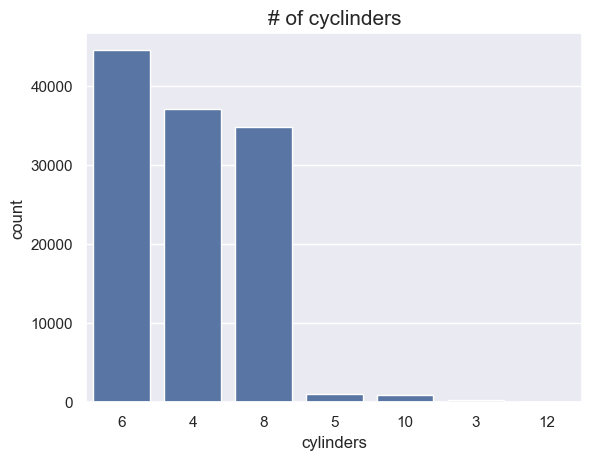

In [33]:
df_cylider=df_vehicles["cylinders"].value_counts().reset_index()
df_cylider.columns=["cylinders","count"]
plt.title("# of cyclinders",size=15)
sns.barplot(df_cylider['cylinders'],df_cylider['count'],color = 'b')

In [34]:
len(df_vehicles)

118672

So for further analysis, we will be considering a total of 118672 records 

#### Now lets explore vehicles per region <br>

Grouping based on region

<AxesSubplot:title={'center':'Used vehicles available by region - top 10'}, xlabel='region', ylabel='count'>

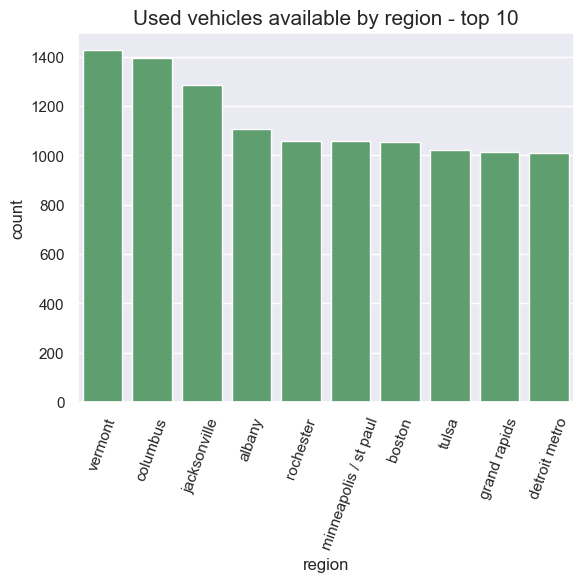

In [82]:
df_reg=df_vehicles["region"].value_counts().reset_index()
df_reg.columns=["region","count"]
plt.xticks(rotation=70)
plt.title("Used vehicles available by region - top 10",size=15)
sns.barplot(df_reg['region'][:10],df_reg['count'][:10],color = 'g')

#### Vermount seems to have the most number of listings of used vehicles 

Exploring based on year of manufacturing

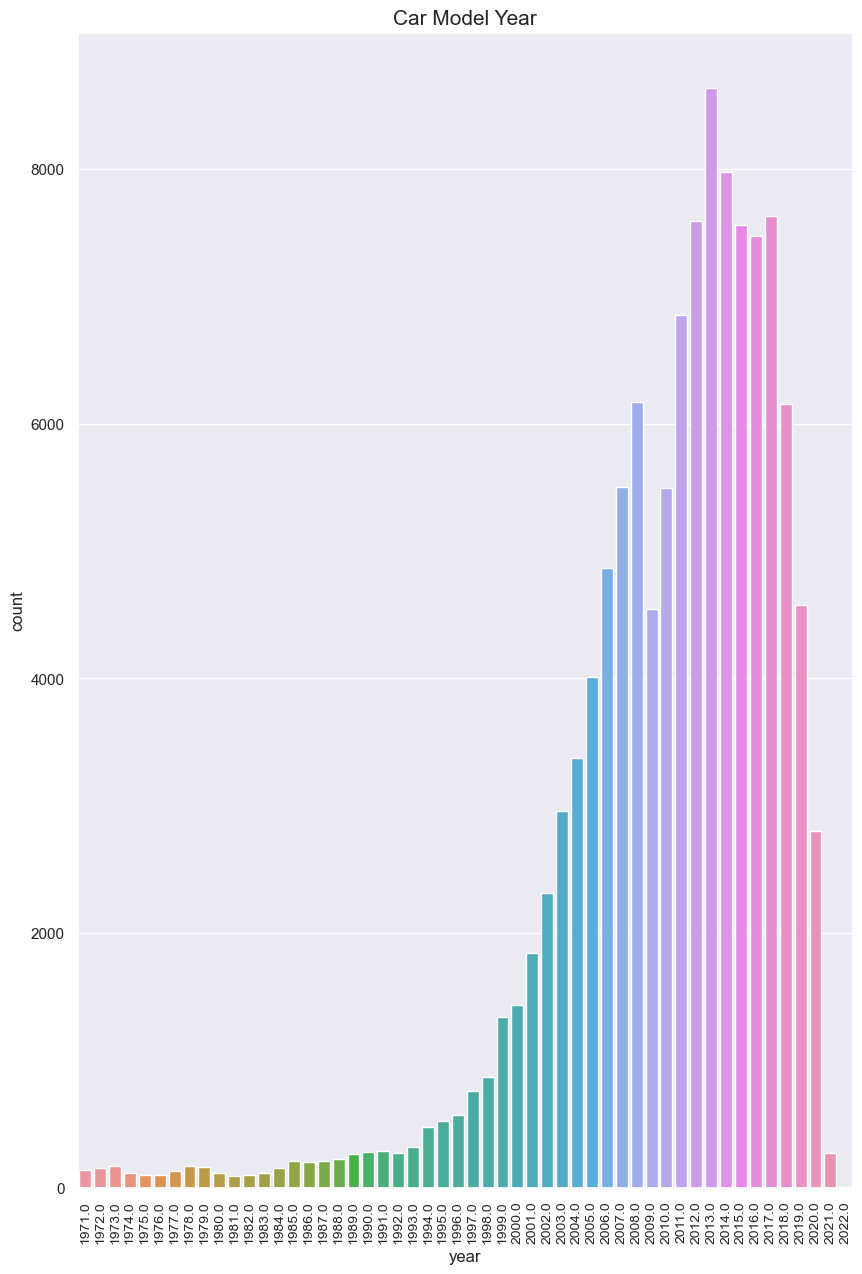

In [36]:
plt.figure(figsize=(10,15))
ax = sns.countplot(df_vehicles['year'])
plt.title("Car Model Year",size=15)
k = ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=10)
fig=ax.get_figure()
fig.savefig("out.png") 

Most vehicles seems to have been made during the 2012-2014 period

#### Grouping vehicles based on color

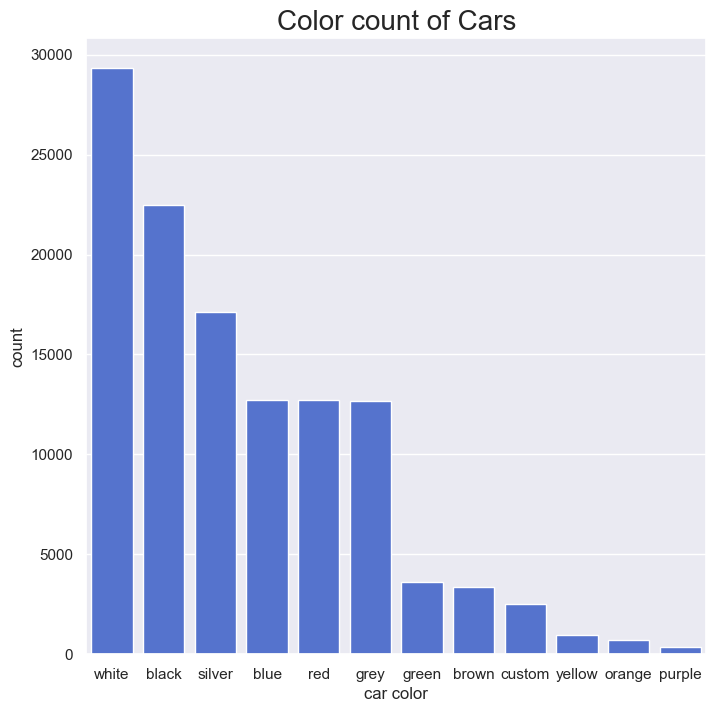

In [37]:
plt.figure(figsize=(8,8))
color_df = df_vehicles['paint_color'].value_counts().reset_index()
color_df.columns = ['car color','count']
plt.title("Color count of Cars",size=20)
sns.barplot(color_df['car color'],color_df['count'],color = 'royalblue')
fig.savefig('temp1.png', dpi=fig.dpi)

Most of the listings seems to be of 'white' color. No surprise there. Lease being purple.

#### Examining price range

In [38]:
df_vehicles[df_vehicles['price']>200000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,type_n,paint_color_n
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,1,8,2,149000.0,0,0,1,4,pickup,white,Thank you to everyone that contacted me concer...,ca,2021-04-11T11:40:08-0700,2,6
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,1,4,1,164290.0,0,0,3,3,sedan,green,No longer need runs and drives great. This ca...,ca,2021-04-06T16:40:31-0700,6,9
106361,orlando,516999,2016.0,others,Lambo Aventador SV Roadster,4,12,1,9982.0,0,0,2,4,convertible,white,"Serious/ready buyers, please reach out via cal...",fl,2021-04-26T17:40:47-0400,10,6
111963,south florida,285000,2021.0,others,Lamborghini huracan evo,3,10,1,950.0,0,0,1,0,coupe,green,2021 Lamborghini Huracan EVO RWD PPF FRONT HA...,fl,2021-05-03T11:00:55-0400,3,9
136516,spokane / coeur d'alene,17000000,2007.0,ram,2500,1,8,2,170000.0,1,0,2,4,pickup,black,07 dodge 2500 mega cab 5.9 diesel 6in lift bul...,id,2021-05-02T19:27:17-0700,2,1
137807,spokane / coeur d'alene,123456789,1999.0,buick,regal,4,6,1,96000.0,0,0,3,4,sedan,white,This supercharged regal is no longer charged s...,id,2021-04-29T08:48:15-0700,6,6
155421,terre haute,1234567,2006.0,jeep,wrangler,4,6,1,123456.0,0,0,2,3,SUV,custom,"Top shelf jeeps, have around 25 in stock, Onl...",in,2021-04-18T11:26:55-0400,5,0
208617,saginaw-midland-baycity,554900,2019.0,others,f250 xlt crewcab,3,8,1,25365.0,4,0,2,0,pickup,white,2019 F250 XLT with new Boss plow. Used twice f...,mi,2021-05-02T18:30:41-0400,2,6
230753,asheville,135008900,2008.0,nissan,titan se kingcab,4,8,1,110500.0,0,0,2,4,truck,grey,2008 Nissan Titan Se Kingcab 4door(suicide doo...,nc,2021-04-16T19:22:21-0400,1,3
274019,long island,261895,2017.0,others,Rolls royce dawn,4,12,1,5600.0,0,0,1,0,convertible,black,HELLO SELLING MY 2017 ROLLS ROYCE DAWN WITH ON...,ny,2021-04-22T23:05:15-0400,10,1


Some of the prices listed seems to be unrealistic .<br>

Boxplot for confirming outliers

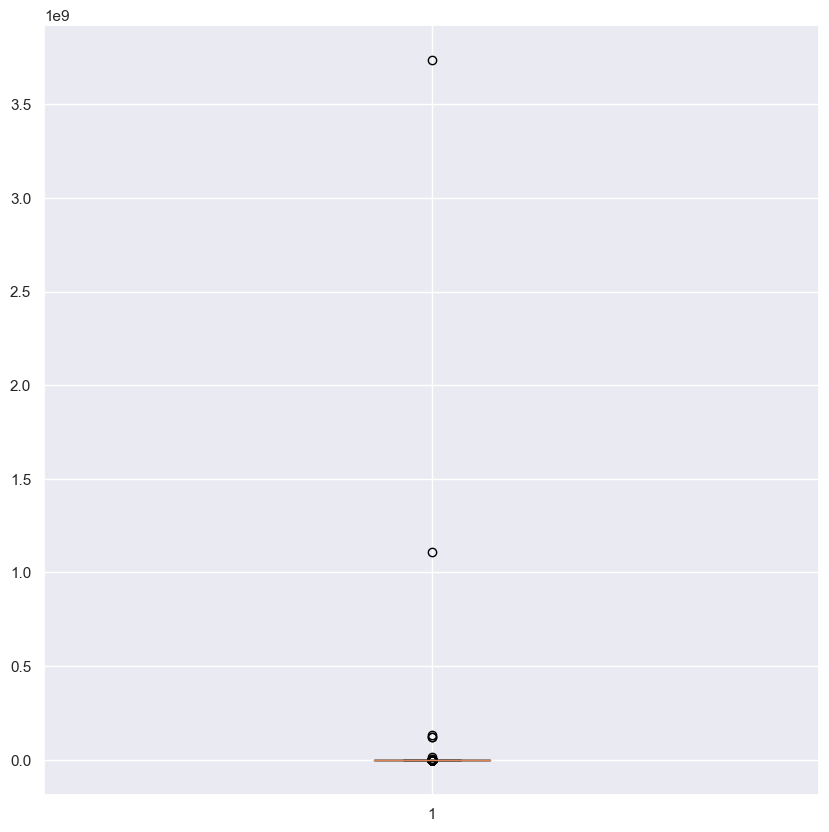

In [39]:
plt.figure(figsize = (10,10))
plt.boxplot(df_vehicles["price"])
plt.show()

The boxplot clearly shows the existence of extreme outliers.

In [40]:
df_vehicles['price'].max()

3736928711

Someone seems to have listed a toyota tundra for 37 billion dollars. Wishful thinking.<br>
For this analysis we will only include records between 1000 - 600000 dollars

In [41]:
final_df=df_vehicles.loc[(df_vehicles['price']>=1000) & (df_vehicles['price']<= 600000)]

In [42]:
len(final_df)

111867

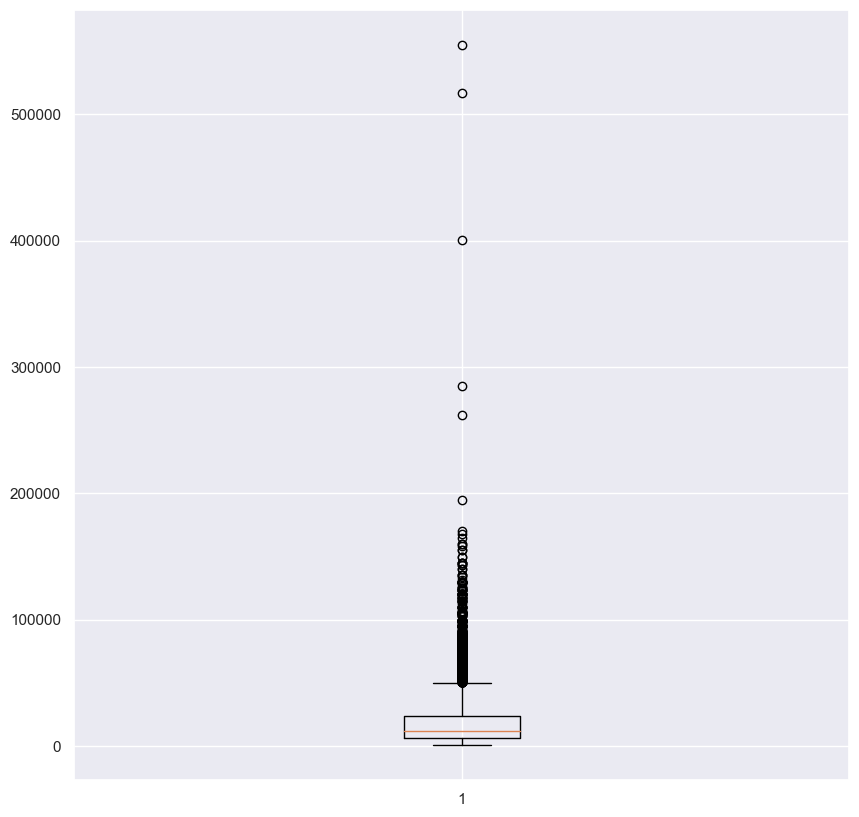

In [43]:
plt.figure(figsize = (10,10))
plt.boxplot(final_df["price"])
plt.show()

We were able to get rid of lot of outliers just by clearing some unrealistic listings

#### Checking for year

Year feature - lower whishker = 1993.0

Here is the boxplot of year after the outliers below lower whishker are removed.


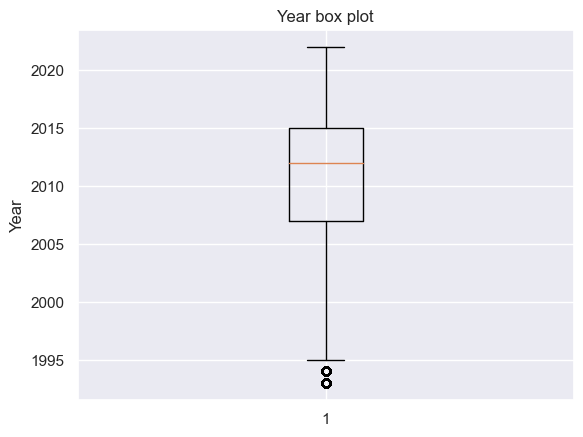

In [44]:
stats = final_df['year'].describe()

upper_quartile = stats[6]
lower_quartile = stats[4]

iqr = upper_quartile - lower_quartile
lower_whisker = final_df['year'][final_df.year>=lower_quartile-1.5*iqr].min()
print("Year feature - lower whishker =", lower_whisker)

dataset_year_updated = final_df[final_df.year>=lower_quartile-1.5*iqr]
print("\nHere is the boxplot of year after the outliers below lower whishker are removed.")
plt.boxplot(dataset_year_updated['year'])
plt.title("Year box plot")
plt.ylabel("Year")
plt.show()

Checking outliers for odometer readings

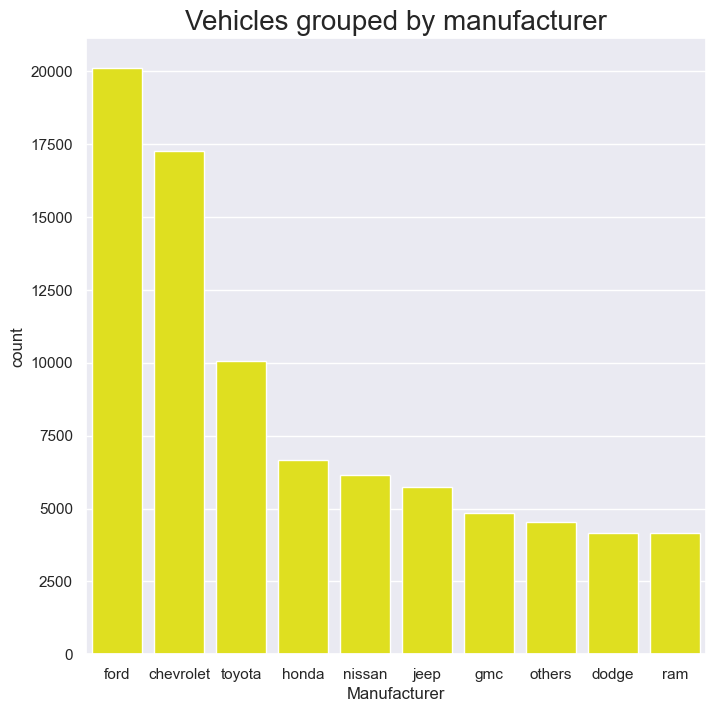

In [87]:
final_df["manufacturer"].value_counts()
plt.figure(figsize=(8,8))
color_df = df_vehicles['manufacturer'].value_counts().reset_index()
color_df.columns = ['Manufacturer','count']
plt.title("Vehicles grouped by manufacturer",size=20)
sns.barplot(color_df['Manufacturer'][:10],color_df['count'][:10],color = 'yellow')
final_df["manufacturer"]=final_df['manufacturer'].astype("category")
final_df["make"]=final_df["make"].cat.codes

In [89]:
final_df["make"].value_counts()


13    19116
7     16175
39     9479
16     6364
30     5787
20     5357
14     4541
31     4290
34     3850
10     3821
4      2994
26     2694
37     2608
17     2458
40     2205
23     2104
8      1882
21     1865
6      1554
5      1433
18     1393
25     1257
3      1214
0      1178
24     1116
29      840
32      806
41      782
28      512
27      425
35      395
36      395
19      354
33      342
12      158
1        45
15       29
11       17
9        16
22        8
2         5
38        3
Name: make, dtype: int64

Odometer feature - upper whishker = 285000

boxplot of odometer with outliers removed.


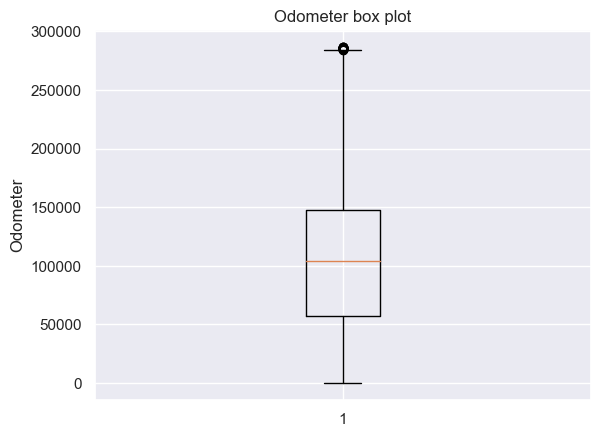

In [45]:
stats = final_df['odometer'].describe()

upper_quartile = stats[6]
lower_quartile = stats[4]

iqr = upper_quartile - lower_quartile
upper_whisker = final_df['price'][final_df.price<=upper_quartile+1.5*iqr].max()
print("Odometer feature - upper whishker =", upper_whisker)

dataset_odo_updated = final_df[final_df.odometer<=upper_quartile+1.5*iqr]
print("\nboxplot of odometer with outliers removed.")
import matplotlib.pyplot as plt
plt.boxplot(dataset_odo_updated['odometer'])
plt.title("Odometer box plot")
plt.ylabel("Odometer")
plt.show()

Further comparing odometer readings and price of the car using scatter plot

<AxesSubplot:xlabel='odometer', ylabel='price'>

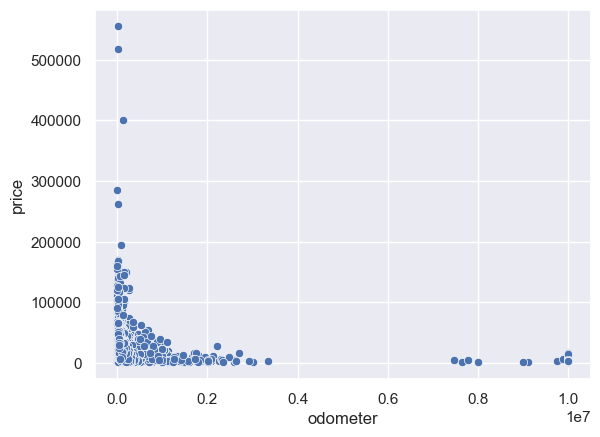

In [46]:
sns.scatterplot(x="odometer",y="price",data=final_df)

Highest prices seems to be towards the lowest odometer readings, which makes sense

Further comparing year of make and price

<AxesSubplot:xlabel='year', ylabel='price'>

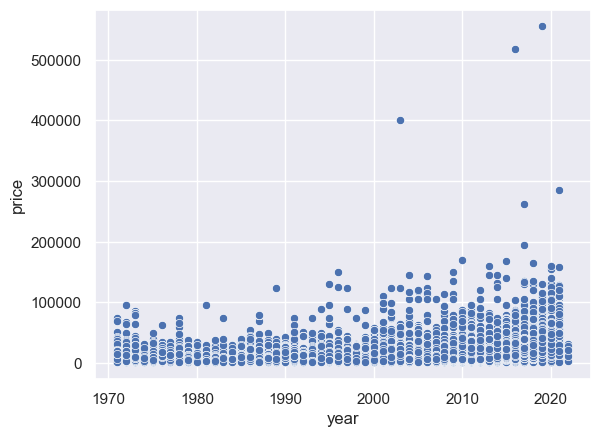

In [47]:
sns.scatterplot(x="year",y="price",data=final_df)

Again, the newest of cars seems to have the highest of prices, which again makes sense

### Performing Factor Analysis

In [66]:
X


,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type_n,paint_color_n
31,2013.0,3,6,1,128000.0,0,0,1,4,1,1
32,2012.0,1,8,1,68696.0,0,2,2,0,2,1
33,2016.0,1,6,1,29499.0,0,2,2,0,2,2
34,2019.0,3,6,1,43000.0,0,0,2,0,1,3
35,2016.0,1,6,1,17302.0,0,2,2,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...
426860,2017.0,1,8,1,41664.0,0,0,2,0,0,1
426863,2017.0,1,6,1,37608.0,0,0,1,0,6,6
426866,2016.0,1,8,1,55612.0,0,0,1,0,0,1
426874,2018.0,1,6,1,30814.0,0,0,1,0,6,6


In [48]:
print(final_df.columns)
X=final_df.drop(columns=['region',
                         'price','manufacturer','model','paint_color','description',
                         'state','posting_date','type']) 
y=final_df['price']

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state',
       'posting_date', 'type_n', 'paint_color_n'],
      dtype='object')


In [49]:

df_data = X.iloc[1: , :]
df_X = StandardScaler().fit_transform(df_data)
pd.DataFrame(df_X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.268153,-1.105981,1.259517,-0.205328,-0.264896,-0.201624,2.655730,-0.140169,-1.342259,-0.958086,-1.245314
1,0.795359,-1.105981,0.014656,-0.205328,-0.507763,-0.201624,2.655730,-0.140169,-1.342259,-0.958086,-0.813314
2,1.190764,0.667794,0.014656,-0.205328,-0.424110,-0.201624,-0.440543,-0.140169,-1.342259,-1.304257,-0.381314
3,0.795359,-1.105981,0.014656,-0.205328,-0.583336,-0.201624,2.655730,-0.140169,-1.342259,-0.958086,0.050686
4,0.136352,-1.105981,1.259517,-0.205328,-0.503190,-0.201624,2.655730,-1.465174,-1.342259,-1.650428,0.050686


In [50]:
df_features =X.columns
feature_list=list(df_features)
feature_list

['year',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type_n',
 'paint_color_n']

#### Covariance Matrix

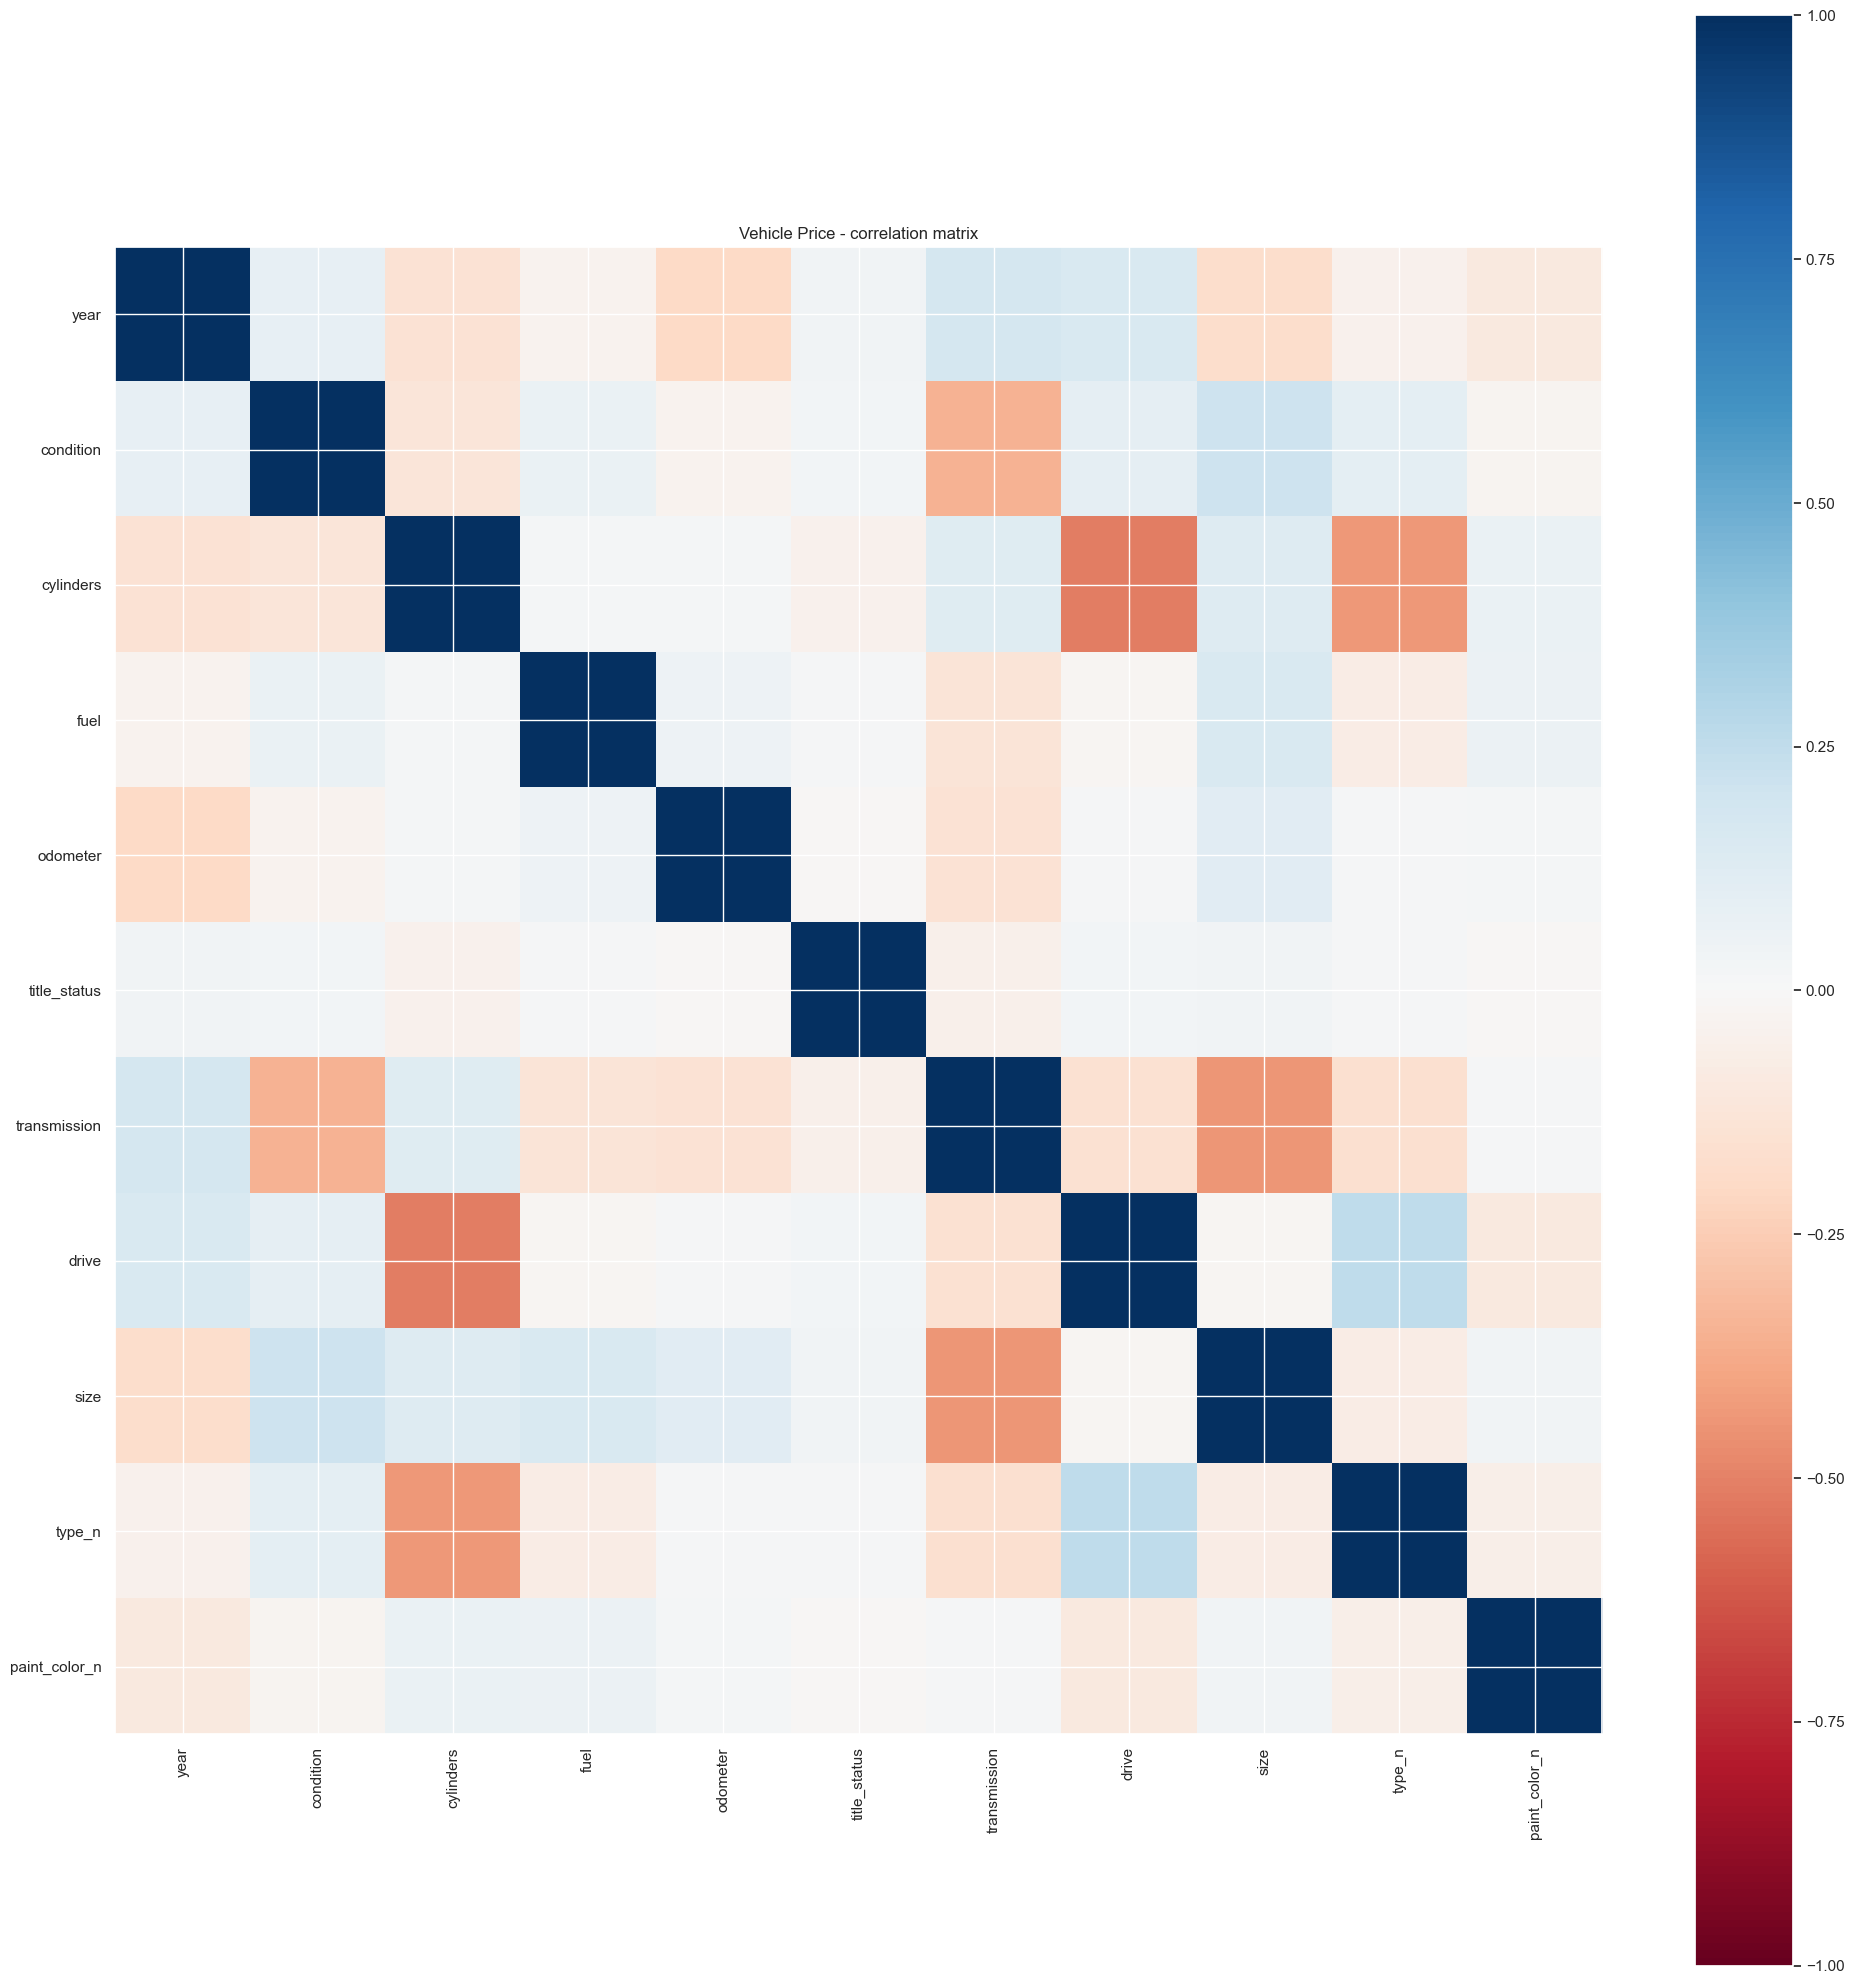

In [51]:
plt.figure(figsize = (20,20))
ax = plt.axes()
im = ax.imshow(np.corrcoef(df_X.T), cmap="RdBu", vmin=-1, vmax=1)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(feature_list, rotation=90)
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_yticklabels(feature_list)
plt.colorbar(im)
ax.set_title("Vehicle Price - correlation matrix")
plt.tight_layout()
plt.show()

In [52]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_X)
chi_square_value, p_value

(135085.20937775224, 0.0)

In [53]:
kmo_all,kmo_model=calculate_kmo(df_X)
kmo_model

0.6183717625250419

We will proceed with the factor analysis since value is > 0.5

#### Defining Analyzer

In [54]:
fa = FactorAnalyzer()
fa.fit(df_X)

FactorAnalyzer(rotation_kwargs={})

Retrieving Eigenvalues and vector from Analyzer object


In [55]:
ev, v = fa.get_eigenvalues()

#### Scree Plot

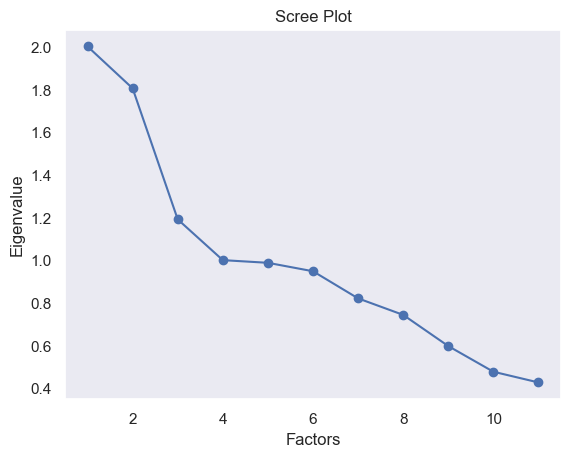

In [56]:

plt.scatter(range(1,df_X.shape[1]+1),ev)
plt.plot(range(1,df_X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [57]:
fa = FactorAnalyzer(rotation="varimax", n_factors=6)
fa.fit(df_X)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

View Eigen vector and values generated

In [58]:
evec,ev=fa.get_eigenvalues()
ev

array([ 1.69210365e+00,  1.41634766e+00,  9.12244210e-01,  6.12451379e-01,
        4.50363888e-01,  1.61520215e-01,  1.62587657e-02,  5.98277241e-03,
       -4.93783279e-04, -2.79966616e-03, -1.90074973e-02])

In [59]:
print(pd.DataFrame(fa.loadings_,index=feature_list))

                      0         1         2         3         4         5
year          -0.036673  0.003748 -0.102378  0.069044  0.831282 -0.137863
condition      0.463358 -0.105315 -0.041263  0.001822  0.113426 -0.017911
cylinders     -0.049961  0.733834  0.005443 -0.284937 -0.152424  0.003340
fuel           0.161293  0.041916  0.032343  0.015877  0.026773  0.343790
odometer       0.037065 -0.001592  0.988939  0.013024 -0.111859  0.054457
title_status   0.067239 -0.029470 -0.009302  0.011486  0.041636  0.017266
transmission  -0.779922  0.120900 -0.096881 -0.066073  0.163243 -0.031311
drive          0.093687 -0.310403  0.016418  0.930479  0.091058 -0.124743
size           0.543663  0.184341  0.068733  0.022644 -0.155449  0.165161
type_n         0.100759 -0.577368  0.004886  0.051631 -0.080907 -0.194192
paint_color_n -0.024972  0.045952  0.001197 -0.055732 -0.081345  0.181857


In [60]:
print(pd.DataFrame(fa.get_factor_variance(), 
                   index=['sum','proportional','cumulative']))

                     0         1         2         3         4         5
sum           1.173852  1.032660  1.005752  0.962955  0.814357  0.255395
proportional  0.106714  0.093878  0.091432  0.087541  0.074032  0.023218
cumulative    0.106714  0.200592  0.292024  0.379565  0.453598  0.476816


## Section 4

### Employing linear regression model for prediction

#### Splitting data into train and test

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#### Scaling before fitting into model

In [62]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#### Linear Regression Model

In [63]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

#### Retrieving model params

In [64]:

print("Coefficients: \n", lr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print(f"intercept: {lr.intercept_}")

Coefficients: 
 [ 6096.41136422  1573.06846556  3768.71403299  1943.98149549
 -1404.85908412   -62.51119468  3232.96237686 -2082.31814478
  -647.87871823 -1531.58225573   333.80913466]
Mean squared error: 79302314.274
Coefficient of determination: 0.55
intercept: 16349.689986926427


In [65]:
score =lr.score(X_train,y_train)
print(score)


0.5068281041856415


## Section 5

### Personal Contribution Statement :
#### Team project: What was your contribution during this Sprint stage? <br> 

This time around time management and catching up with each other was a challenge since both of us fell sick at almost the same time. So we had to scramble a bit at the end. Contributions to most sections were equally divided.
        We were on call most of the time sharing code and ideas. <br> <br>
        What could have been done better (future improvements of your work)?<br>
            This sprint was a bit bad for us cause of health issues but in future we dont anticipate any such struggles. We could only test one model and did not get much of a chance to tune it.
            In future, We intend to employ more models and further tune the existing ones.
            <br><br>
    
#### Individual project: 
   What could have been done better  (future improvements of your work)? <br>
     
   I personally could have advocated to add more models or atleast tuned  the currently employed prediction model . Unfortunately time management was bad in this sprint and the same needs to be corrected from next. One thing about the entire experience was that we both were in sync regarding most of the decisions and hopefully the same will continue.
    